In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, LeakyReLU
from keras.preprocessing import sequence
from keras.metrics import MeanSquaredError
from keras.layers.normalization import BatchNormalization
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, LeakyReLU
from keras.preprocessing import sequence
from keras.metrics import MeanSquaredError
from keras.layers.normalization import BatchNormalization
from matplotlib import pyplot as plt

In [3]:
# 1. 데이터 준비
df1 = pd.read_csv('test_data1.csv',encoding='cp949')
df2 = pd.read_csv('test_data2.csv',encoding='cp949')

In [4]:
df = pd.concat([df1,df2])
df.set_index(np.arange(df.shape[0]),inplace=True)

In [5]:
df[df.duplicated(['date','hour'],keep='first')].index

Int64Index([683], dtype='int64')

In [6]:
df.drop(683,inplace=True)

In [7]:
X = df.pivot(index='date',columns='hour',values='PV')[0:-1]
y = df.pivot(index='date',columns='hour',values='PV')[1:]
y.fillna(0,inplace=True)

In [8]:
x_train = X.values.reshape(32,24,1)
y_train = y.values

In [9]:
y_train.shape

(32, 24)

In [10]:
# 2. 모델생성
model = Sequential()
model.add(LSTM(100,input_shape=(24,1)))
model.add(Dense(255,activation='tanh'))
model.add(Dense(255))
model.add(LeakyReLU())
model.add(Dense(24))

In [11]:
model = Sequential()
model.add(LSTM(100,input_shape=(24,1)))
model.add(BatchNormalization())
model.add(Dense(256,activation='tanh'))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.4))
model.add(Dense(24))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                6168      
Total params: 139,016
Trainable params: 138,816
Non-trainable params: 200
______________________________________________

In [13]:
#3. 모델설정
model.compile(loss='mean_squared_error',
            optimizer='adam', metrics=[MeanSquaredError()])

Epoch 1/500
7/7 [==============================] - 0s 13ms/step - loss: 5517.1191 - mean_squared_error: 5517.1191
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 5458.6982 - mean_squared_error: 5458.6982
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 5307.9180 - mean_squared_error: 5307.9180
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 5036.8682 - mean_squared_error: 5036.8682
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 4601.0732 - mean_squared_error: 4601.0732
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 4222.0146 - mean_squared_error: 4222.0146
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 3697.0325 - mean_squared_error: 3697.0325
Epoch 8/500
7/7 [==============================] - 0s 11ms/step - loss: 3061.7920 - mean_squared_error: 3061.7920
Epoch 9/500
7/7 [==============================] - 0s 8ms/step - loss: 2529.7236 - mean_square

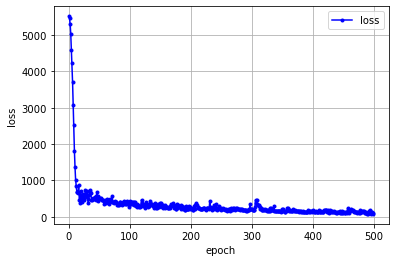

In [14]:
# 4. 모델 학습
history = model.fit(x_train,y_train,epochs=500,batch_size=5)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c="blue", label='loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()